In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image

In [2]:
ROOT_DIR = "F:\casme2\CASME2_RAW_selected\CASME2_RAW_selected"

In [3]:
df = pd.read_excel(
    "F:\casme2\CASME2-coding-20140508.xlsx", 
    usecols=["Subject", "Filename", "OnsetFrame", "ApexFrame", "OffsetFrame", "Action Units", "Estimated Emotion"]
    )

In [4]:
df.head(3)

,Subject,Filename,OnsetFrame,ApexFrame,OffsetFrame,Action Units,Estimated Emotion
0,1,EP02_01f,46,59,86,12,happiness
1,1,EP03_02,131,139,161,18,others
2,1,EP04_02,21,54,76,4,others


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Subject            255 non-null    int64 
 1   Filename           255 non-null    object
 2   OnsetFrame         255 non-null    int64 
 3   ApexFrame          255 non-null    object
 4   OffsetFrame        255 non-null    int64 
 5   Action Units       255 non-null    object
 6   Estimated Emotion  255 non-null    object
dtypes: int64(3), object(4)
memory usage: 14.1+ KB


<BarContainer object of 7 artists>

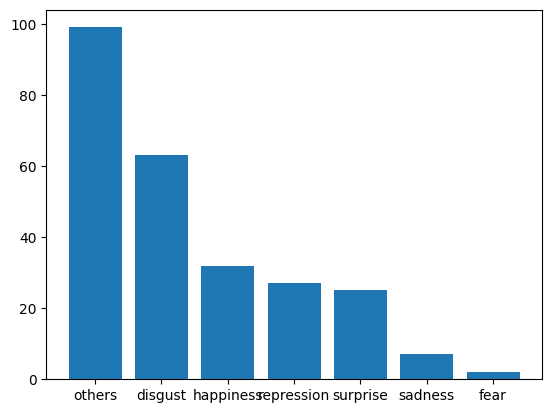

In [6]:
plt.bar(df["Estimated Emotion"].value_counts().index, df["Estimated Emotion"].value_counts().values)

In [7]:
frame_length = df['OffsetFrame'] - df['OnsetFrame']

In [8]:
print("Minumum fames: ", min(frame_length))
print("Maximum frames: ", max(frame_length))

Minumum fames:  23
Maximum frames:  140


In [9]:
(df["OnsetFrame"] == df["ApexFrame"]).sum(), (df["ApexFrame"] == df["OffsetFrame"]).sum()

(1, 4)

In [10]:
offset_from_apex = list()
left_min, right_min = None, None
left_max, right_max = None, None

for i in df.iterrows():
    if type(i[1]["ApexFrame"]) not in [int, float]:
        i[1]["ApexFrame"] = i[1]["OnsetFrame"] + (i[1]["OffsetFrame"] - i[1]["OnsetFrame"]) // 2

    left_offset = i[1]["ApexFrame"] - i[1]["OnsetFrame"]
    right_offset = i[1]["OffsetFrame"] - i[1]["ApexFrame"]

    if left_min is None or left_offset < left_min:
        left_min = left_offset
    if right_min is None or right_offset < right_min:
        right_min = right_offset
    if left_max is None or left_offset > left_max:
        left_max = left_offset
    if right_max is None or right_offset > right_max:
        right_max = right_offset

    offset_from_apex.append((left_offset, right_offset))

print("Left min: ", left_min)
print("Right min: ", right_min)
print("Left max: ", left_max)
print("Right max: ", right_max)


Left min:  0
Right min:  0
Left max:  88
Right max:  102


In [11]:
path_to_single_frame = os.path.join(ROOT_DIR, "sub0" + str(df["Subject"][0]), df["Filename"][0], "img"+ str(df["OnsetFrame"][0]) + ".jpg")

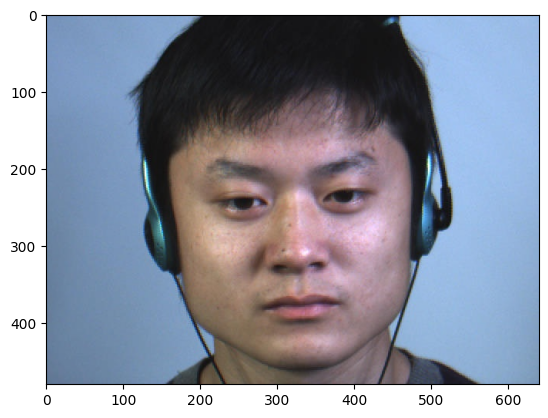

In [12]:
image = Image.open(path_to_single_frame)
plt.imshow(image)

In [13]:
image.size

(640, 480)